In [72]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [74]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = [train_df, test_df]

In [75]:
#checking lables and sample data of each columns
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
#count of null value in each columns
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
#categorical
#object − Summarizes String columns
#number − Summarizes Numerical values
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Calic, Mr. Petar",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Columns which may contribute in survival:
* Age
* Embarked

Columns which may be dropped:
* Name
* ID
* Cabin

Previous Assumptions:

* Women (Sex=female) were more likely to have survived.
* Children were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

In [79]:
#checking the corellation between Pclass and survivals
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [80]:
#checking the corellation between Sex and survivals
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [81]:
#Embarked vs survival
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


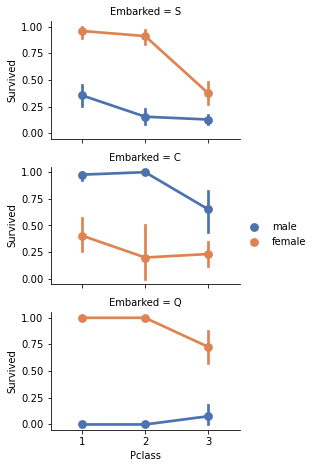

In [82]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


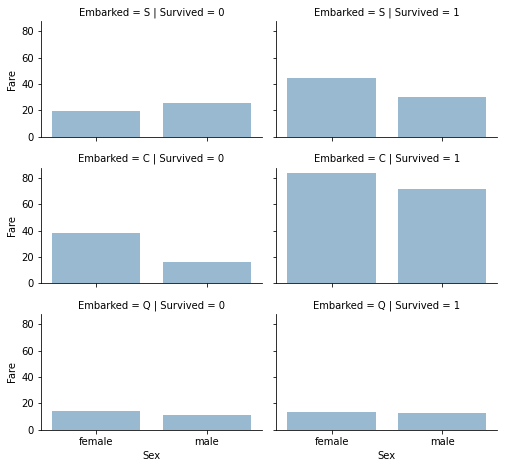

In [83]:
grid = sns.FacetGrid(train_df, row='Embarked',col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None)
grid.add_legend()

In [84]:
#dropping the Cabin and Ticket Features
train_df=train_df.drop(['Ticket', 'Cabin'],axis=1)
test_df=test_df.drop(['Ticket', 'Cabin'],axis=1)
combine = [train_df, test_df]

In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [86]:
for data in combine:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.')
data.groupby(['Title'])

In [87]:
#Reducing the Title

for data in combine:
    data['Title']=data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

train_df[['Title','Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [88]:
#converting the titles to Numerical value(Kind of Encoding)
title_map={"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combine:
    data['Title']=data['Title'].map(title_map)
    #data['Title']=data['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [89]:
#test_df
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [90]:
#dropping the id and name from training data
#dropping the name from test data
train_df=train_df.drop(['Name','PassengerId','Fare'],axis=1)
test_df=test_df.drop(['Name','Fare'],axis=1)
combine=[train_df,test_df]
train_df.shape
test_df.shape

(418, 8)

In [91]:
sex_map={"male":0,"female":1}
for data in combine:
    data['Sex']=data['Sex'].map(sex_map).astype(int)

train_df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22.0,1,0,S,1
1,1,1,1,38.0,1,0,C,3
2,1,3,1,26.0,0,0,S,2
3,1,1,1,35.0,1,0,S,3
4,0,3,0,35.0,0,0,S,1


Imputer:
* We can fill NULL value of Age using Mean.Median,Mode!
* More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on.
* Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.



/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


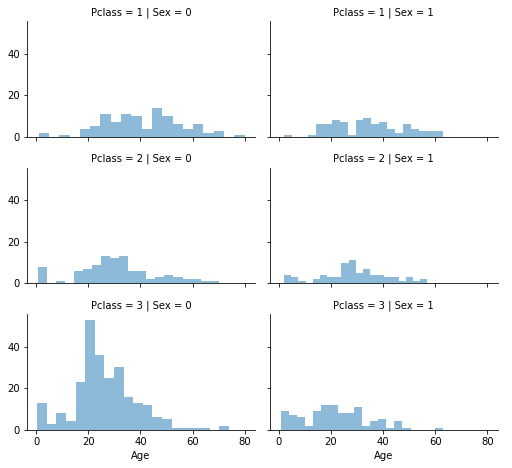

In [92]:
#lets plot grid plot to see the value more precisely
grid = sns.FacetGrid(train_df, row='Pclass',col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [93]:
#sex:0 and 1 #Pclass:0,1,2
guess_age = np.zeros((2,3))
for data in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess=data[(data['Sex']==i) & (data['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess.median()#calculating median age
            guess_age[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = guess_age[i,j]

    data['Age'] = data['Age'].astype(int)

train_df.head()
        

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22,1,0,S,1
1,1,1,1,38,1,0,C,3
2,1,3,1,26,0,0,S,2
3,1,1,1,35,1,0,S,3
4,0,3,0,35,0,0,S,1


In [94]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
Title       0
dtype: int64

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

In [95]:
train_df['Age_band']=pd.cut(train_df['Age'],5)
train_df[['Age_band','Survived']].groupby(['Age_band'],as_index=False).mean().sort_values(by='Age_band')

,Age_band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [96]:
for data in combine:
    data.loc[data['Age']<=16,'Age']=0
    data.loc[(data['Age']>16) & (data['Age']<=32),'Age']=1
    data.loc[(data['Age']>32) & (data['Age']<=48),'Age']=2
    data.loc[(data['Age']>48) & (data['Age']<=64),'Age']=3
    data.loc[(data['Age']>64),'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_band
0,0,3,0,1,1,0,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,S,1,"(32.0, 48.0]"


In [97]:
train_df = train_df.drop(['Age_band'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1,1,0,S,1
1,1,1,1,2,1,0,C,3
2,1,3,1,1,0,0,S,2
3,1,1,1,2,1,0,S,3
4,0,3,0,2,0,0,S,1


In [98]:
Emb_freq=train_df['Embarked'].mode()[0]

In [99]:
Emb_freq
for data in combine:
    data['Embarked']=data['Embarked'].fillna(Emb_freq)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1,1,0,S,1
1,1,1,1,2,1,0,C,3
2,1,3,1,1,0,0,S,2
3,1,1,1,2,1,0,S,3
4,0,3,0,2,0,0,S,1


In [100]:
train_df.isnull().sum()
#we can see below all the null values have been removed

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
dtype: int64

In [101]:
for data in combine:
    data['Embarked']=data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1,1,0,0,1
1,1,1,1,2,1,0,1,3
2,1,3,1,1,0,0,0,2
3,1,1,1,2,1,0,0,3
4,0,3,0,2,0,0,0,1


In [102]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,0,2,0,0,2,1
1,893,3,1,2,1,0,0,3
2,894,2,0,3,0,0,2,1
3,895,3,0,1,0,0,0,1
4,896,3,1,1,1,1,0,3


In [103]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1,1,0,0,1
1,1,1,1,2,1,0,1,3
2,1,3,1,1,0,0,0,2
3,1,1,1,2,1,0,0,3
4,0,3,0,2,0,0,0,1


Getting data ready to feed into the models

In [104]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [105]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.13

KNN classifier with various neighbour values

In [131]:
Knn_Acc=-1.0
for i in range(1,10,2):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    acc_log = round(knn.score(X_train, Y_train) * 100, 2)
    print('Neighbours=',i)
    print(acc_log)
    if Knn_Acc<acc_log:
        Knn_Acc=acc_log
print(Knn_Acc)

Neighbours= 1
66.33
Neighbours= 3
84.4
Neighbours= 5
84.18
Neighbours= 7
83.61
Neighbours= 9
83.16
84.4


Decision Tree

In [121]:
dnn=DecisionTreeClassifier()
dnn.fit(X_train,Y_train)
Y_pred=dnn.predict(X_test)
dnn_acc = round(dnn.score(X_train, Y_train) * 100, 2)
dnn_acc

86.87

Random Forest classifier with various estimators

In [134]:
rf_acc=0
for n in range(5,50,20):
    rf=RandomForestClassifier(n_estimators=n)
    rf.fit(X_train,Y_train)
    Y_pred=rf.predict(X_test)
    acc_log = round(rf.score(X_train, Y_train) * 100, 2)
    print('n_estimators:',n)
    print(acc_log)
    rf_acc=max(rf_acc,acc_log)

n_estimators: 5
86.08
n_estimators: 25
86.87
n_estimators: 45
86.76


In [149]:
for c in range(1,10):
    svm=SVC(C=c)
    svm.fit(X_train,Y_train)
    Y_pred=svm.predict(X_test)
    acc_svm = round(svm.score(X_train, Y_train) * 100, 2)
    print(acc_svm)

81.93
82.04
82.27
82.15
82.6
82.83
82.83
82.94
82.94


In [150]:
model=pd.DataFrame({'ModelType':['Logistic_Regression','Knn','Decision Tree','Random Forest','SVM'],
                   'Accuracy':[acc_log,Knn_Acc,dnn_acc,rf_acc,acc_svm]})
model.sort_values(by='Accuracy',ascending=False)

,ModelType,Accuracy
2,Decision Tree,86.87
3,Random Forest,86.87
0,Logistic_Regression,86.76
1,Knn,84.40
4,SVM,82.94
